## Bipartite model for HCI in VA

what's going on:

-this is the most simplified version of the model in order to test out why pycx is not running the simulation

-one target per perceiver. One expectation and one performance metric, all owned by nodes.

-Update: since last test, I fixed Key Errors throughout much of the code by giving all nodes both 'expecatation.1' and 'performance.1'. I need to find a way to output what's important, and only that. The below code attempts to color code perceivers and targets by their level of expectation and their level of performanc respectively. This won't work. An alternative is to skip the graphic visualization and output a matrix of values for each run.





In [1]:
## for python, to get pycx
#import os
#print os.getcwd()
#import sys
#module_path = os.path.abspath(os.path.join('.'))
#if module_path not in sys.path:
#    sys.path.append(module_path)

#sys.path.append(os.path.join(os.getcwd(), "pycx-0.32"))    
    
#print sys.path

## Import libraries 

In [19]:

%matplotlib inline 
#taken from assignment

import networkx as nx
import numpy
import matplotlib.pyplot as plt

from networkx.algorithms import bipartite

#import matplotlib
#matplotlib.use('TkAgg')

import pylab as PL
import random as RD

from random import random



RD.seed()

PoorVAProb = 0.2 #probability that VA severely underperforms


#col = {0:'w', 1:'k'} --  consider a property for perceivers only that illustrates level of expectations met


## Create graph

This part creates the bipartite graph with nodes and edges. Note: the current setup contains 6 nodes of one type and 10 of the other with variablity in connections
Note: NetworkX does not have a custom bipartite graph class but the Graph() or DiGraph() classes can be used to represent bipartite graphs. Keep track of which set each node belongs to, and make sure that there is no edge between nodes of the same set (this inhibits me from having personal targets learn from each other; expansion possible with tripartite on conglomerate sharing). The convention used in NetworkX is to use a node attribute named bipartite with values 0 or 1 to identify the sets each node belongs to.

## Option 1 (using)


In [20]:
B = nx.Graph()  #nx path graph?
#B.pos = nx.spring_layout(B)
B.add_nodes_from([1,2,3], bipartite=0) #perceivers, top nodes
# Add the node attribute "bipartite" - Targets = 1
B.add_nodes_from(['a','b','c'], bipartite=1)
B.add_edges_from([(1,'a'), (2,'b'), (3,'c')])



In [21]:
print((B.number_of_nodes(), B.number_of_edges())) 


(6, 3)


## Create two sets for "bipartite"

Did this because False on nx.is.connected(B); better of for titling

Reference: https://networkx.github.io/documentation/networkx-1.9/reference/algorithms.bipartite.html?highlight=bipartite

In [22]:
#make them targets and perceivers
perceivers = {n for n, d in B.nodes(data=True) if d['bipartite']==0} # perceivers top
targets = set(B) - perceivers

print perceivers
print targets

set([1, 2, 3])
set(['a', 'c', 'b'])


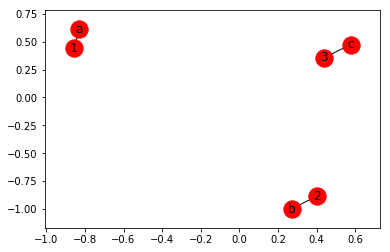

In [23]:
#B_layout = nx.spring_layout(B, iterations=1000)
#nx.draw_networkx(B, pos=B_layout)
#why are there no edges????

#c = bipartite.color(B)
#print(c)
nx.draw_networkx(B)

## Add attributes (option 1)
all values in setup are arbitrary during program development

In [68]:

#SET INITIAL WEIGHTS FOR EXPECTATIONS AND PERFORMANCE

B.node['a']['VA.type'] = 'personal assistant'
B.node['b']['VA.type'] = 'personal assistant'
B.node['c']['VA.type'] = 'personal assistant'

B.node[1]['expectation.1'] = 1
B.node[2]['expectation.1'] = 1 
B.node[3]['expectation.1'] = 1


B.node['a']['performance.1'] = 0
B.node['b']['performance.1'] = 0
B.node['c']['performance.1'] = 0

#give them both performance and expectation, otherwise deadling with empty keys in dictionary.

B.node[1]['performance.1'] = 0
B.node[2]['performance.1'] = 0 
B.node[3]['performance.1'] = 0


B.node['a']['expectation.1'] = 0
B.node['b']['expectation.1'] = 0
B.node['c']['expectation.1'] = 0

In [37]:
# test attributes
print B.node['a']['performance.1']
print B.node[1]['expectation.1']

0
1


## visualize graph (not using)
not using spring (which documemntation says is default...)


In [26]:
#B_layout = nx.spring_layout(B, iterations=1000)
#nx.draw_networkx(B, pos=B_layout)

## Test Connections
Only run this to test setup

In [69]:

#Test connections
nx.is_connected(B)
#bottom_nodes, top_nodes = bipartite.sets(B)



print B.number_of_nodes()
print B.number_of_edges()
print list(B.nodes)
print list(B.edges)
print list(targets)
print list(B.adj[1])
print B.degree[1]

print perceivers

print(bipartite.is_bipartite(B))
bipartite.is_bipartite_node_set(B,perceivers)
bipartite.is_bipartite_node_set(B,targets)

print dict(B.edges)
#bipartite code not working https://networkx.github.io/documentation/latest/reference/algorithms/bipartite.html
#sets(B[, perceivers])
#color(B)
#nx.connected_components(B)

6
3
['a', 1, 2, 3, 'c', 'b']
[('a', 1), (2, 'b'), (3, 'c')]
['a', 'c', 'b']
['a']
1
set([1, 2, 3])
True
{('a', 1): {}, (3, 'c'): {}, (2, 'b'): {}}


## set initial expectations and performance values

In [10]:
def init():
    global B, nextB
    
    time = 0
    
    B = nx.Graph() 
    for i in B.nodes():
        #set performance randomly to .7 or .3. there is nothing meaningful to this implementation
        B.node[i]['performance.1'] = .7 if random() < .5 else .3
    
    nextB = B.copy()
    #FIXME should not need anything else. ?

In [70]:
#test above code
time = 0
for i in B.nodes():
        #set performance randomly to .7 or .3. there is nothing meaningful to this implementation
    B.node[i]['performance.1'] = .7 if random() < .5 else .3
    

print B.node['a']['performance.1']
print B.node['b']['performance.1']
print B.node['c']['performance.1']

B.pos = nx.spring_layout(B)
print B.pos

0.3
0.7
0.7
{'a': array([ 0.56339707, -0.92982581]), 1: array([ 0.73058218, -0.92024478]), 2: array([-0.48992189, -0.03171275]), 3: array([ 0.00784193,  1.        ]), 'c': array([-0.15835024,  0.9773766 ]), 'b': array([-0.65354905, -0.09559326])}


## Draw network. 
testing of this fxn in spyder has not been successful. below are multiple approaches in hope to find the error

In [15]:
#one attempt 

def draw():
    PL.cla()
    nx.draw(B, pos, node_color=range(24), node_size=600, cmap=plt.cm.Reds) #, pos = positions, edge_color = [col[network.node[n]['state']] for n in network.nodes()])
   # nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)
    #https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_node_colormap.html
 
#    nx.draw(g, vmin = 0, vmax = 1,
#            node_color = [g.nodes[i]['state'] for i in g.nodes],
#            pos = g.pos)
    PL.axis('image')
    PL.title('t = ' + str(time))

In [ ]:
##in SPYDER
def draw():
    PL.cla()
    #nx.draw(B, pos, node_color=range(24), node_size=600, cmap=plt.cm.Reds) #, pos = positions, edge_color = [col[network.node[n]['state']] for n in network.nodes()])

   # nx.draw(B) #, pos = positions, edge_color = [col[network.node[n]['state']] for n in network.nodes()])
    nx.draw(B, vmin = 0, vmax = 1, 
            node_color = [B.nodes[i]['expectation.1'] for i in B.nodes], 
            cmap=plt.cm.Reds, 
            pos = B.pos)
    PL.axis('image')
    PL.title('t = ' + str(time))

KeyError: 'perfomance.1'

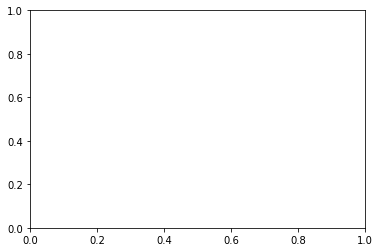

In [76]:
#test above code

#testing out a dictionary because get KeyError on expectation
# color by path length from node near center


PL.cla()
#nx.draw(B, vmin = 0, vmax = 1, node_color = [B.nodes[i]['expectation.1'] for i in B.nodes()], 
#        cmap=plt.cm.Reds, pos = B.pos)



nx.draw_networkx_nodes(B, pos = B.pos,
                       nodelist=['a','b','c'],
                       #node_color='r',
                       node_color = [B.nodes['perfomance.1'] for i in B.nodes()], cmap=plt.cm.Reds,
                       #node_color = [B.nodes['perfomance.1'] in nodeslist], cmap=plt.cm.Reds,
                       #node_color = B.nodes['perfomance.1'] for targets, cmap=plt.cm.Reds,



                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(B, pos = B.pos,
                       nodelist=[1,2,3],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)

PL.axis('image')
PL.title('t = ' + str(time))

Note: still getting Key Error on the above even though all nodes have performance.1 now

## The STEP
add limits (only loop if values of performance and expectation are 0-1)
check code on node and node neighbor. may not need it this way and just 'for i' (since expectation and performance are specific to type of node)

In [16]:
def step():
    global time, B, nextB

    time += 1

 #this code assumes constant performance and also assumes constant interaction

    for i in B.nodes(): 
        for j in B.neighbors(i):
            if (B.node[i]['performance.1'] >= 0) and (B.node[i]['performance.1'] =< 1)
            #if the target's performance is what perceiver expected, keep expectation what it was
                if B.node[i]['performance.1'] == B.node[j]['expectation.1'] :
                    nextB.node[j]['expectation.1'] = B.node[j]['expectation.1'] # nextB.node[i]['state'] = 100 #FIXME placeholder value
                if ((B.node[i]['performance.1'])-(B.node[j]['expectation.1'])) > 0 : #if the difference is that performance is greater, keep expectation to simplify
                    nextB.node[j]['expectation.1'] = B.node[i]['performance.1']
                if ((B.node[i]['performance.1'])-(B.node[j]['expectation.1'])) < 0 : #if the difference is that expecttion is greater, bring expectation down
                    nextB.node[j]['expectation.1'] = B.node[i]['performance.1']+.2 #take the expectation down by bringing it closer to performance --arbitrary method
            #if RD.random() < PoorVAProb:
              #  nextB.node[i]['expectation.1'] = .5 #reset some 
                       # break
            else: # adaptive link cutting behavior
                nextB.node[i]['performance.1'] = 0
                
    del B
    B = nextB.copy()

In [77]:
#test above
nextB = B.copy()
time += 1


# this code assumes constant performance and also assumes constant interaction

for i in B.nodes():
    for j in B.neighbors(i):
        if (B.node[i]['performance.1'] >= 0) and (B.node[i]['performance.1'] <= 1):
            # if the target's performance is what perceiver expected, keep expectation what it was
            if B.node[i]['performance.1'] == B.node[j]['expectation.1']:
                nextB.node[j]['expectation.1'] = B.node[j]['expectation.1']  # nextB.node[i]['state'] = 100 #FIXME placeholder value
            if ((B.node[i]['performance.1']) - (B.node[j]['expectation.1'])) > 0:  # if the difference is that performance is greater, keep expectation to simplify
                nextB.node[j]['expectation.1'] = B.node[i]['performance.1']
            if ((B.node[i]['performance.1']) - (B.node[j]['expectation.1'])) < 0:  # if the difference is that expecttion is greater, bring expectation down
                nextB.node[j]['expectation.1'] = B.node[i][
                                                     'performance.1'] + .2  # take the expectation down by bringing it closer to performance --arbitrary method
                # if RD.random() < PoorVAProb:
                #  nextB.node[i]['expectation.1'] = .5 #reset some 
                # break
        else:  # adaptive link cutting behavior
            nextB.node[i]['performance.1'] = 0




#del B
B = nextB.copy()

print nextB


## Step as line code (outside of fxn) - DONT USE THIS

In [ ]:
for i in B.nodes(): #for i in perceiver():
        if B.node[i]['performance.1'] == B.adj[i][j]['expectation.1'] :
           # nextB.node[i]['state'] = 100 #FIXME placeholder value
            nextB.adj[perceiver][target]['expectation.1'] = 50
            for j in B.adj(i):
                if B.adj[j]['expectation.1'] < 60 : #if it's generally high
                    if RD.random() < PoorVAProb:
                   # if RD.random() < infectionProb:
                        nextB.node[i]['expectation.1'] = 5
                        break
                    else: # adaptive link cutting behavior
                        nextB.node[i]['expectation.1'] = B.node[i]['expectation.1'] + 10
        if B.node[target]['performance.1'] < B.adj[perceiver][target]['expectation.1'] :        # if B.node[target]['performance.1'] < B.adj[perceiver][target]['expectation.1']

           nextB.adj[perceiver][target]['expectation.1'] = 10
           
                
        else:
             nextB.adj[perceiver][target]['expectation.1'] = B.adj[perceiver][target]['expectation.1'] + 40
                

In [49]:
import pycxsimulator
pycxsimulator.GUI().start(func=[init,draw,step])

References

Sayama

https://networkx.github.io/documentation/stable/reference/algorithms/bipartite.html